 # Домашнее задание 1. Линейные модели

### Першаев Никита ИУ8-83 Вариант 10

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error as RMSE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, f1_score

# 1. Задача регресссии (9 баллов)

Постройте модель машинного обучения, решающую задачу регресии на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 1.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки pandas

In [188]:
baseline = 0.8
# Import data
redWine = pd.read_csv('./data/winequality-red.csv', sep=";")
whiteWine = pd.read_csv('./data/winequality-white.csv', sep=";")
# Join tables
wineQuality = pd.concat([redWine, whiteWine], ignore_index=True, sort=False)

def errorLine(metricRate: float):
    return f'Baseline: {baseline} RMSE: {metricRate}'

## 1.2 График совместного распределения признаков


Постройте график совместного распределения количественных признаков при помощи функции pairplot библиотеки seaborn

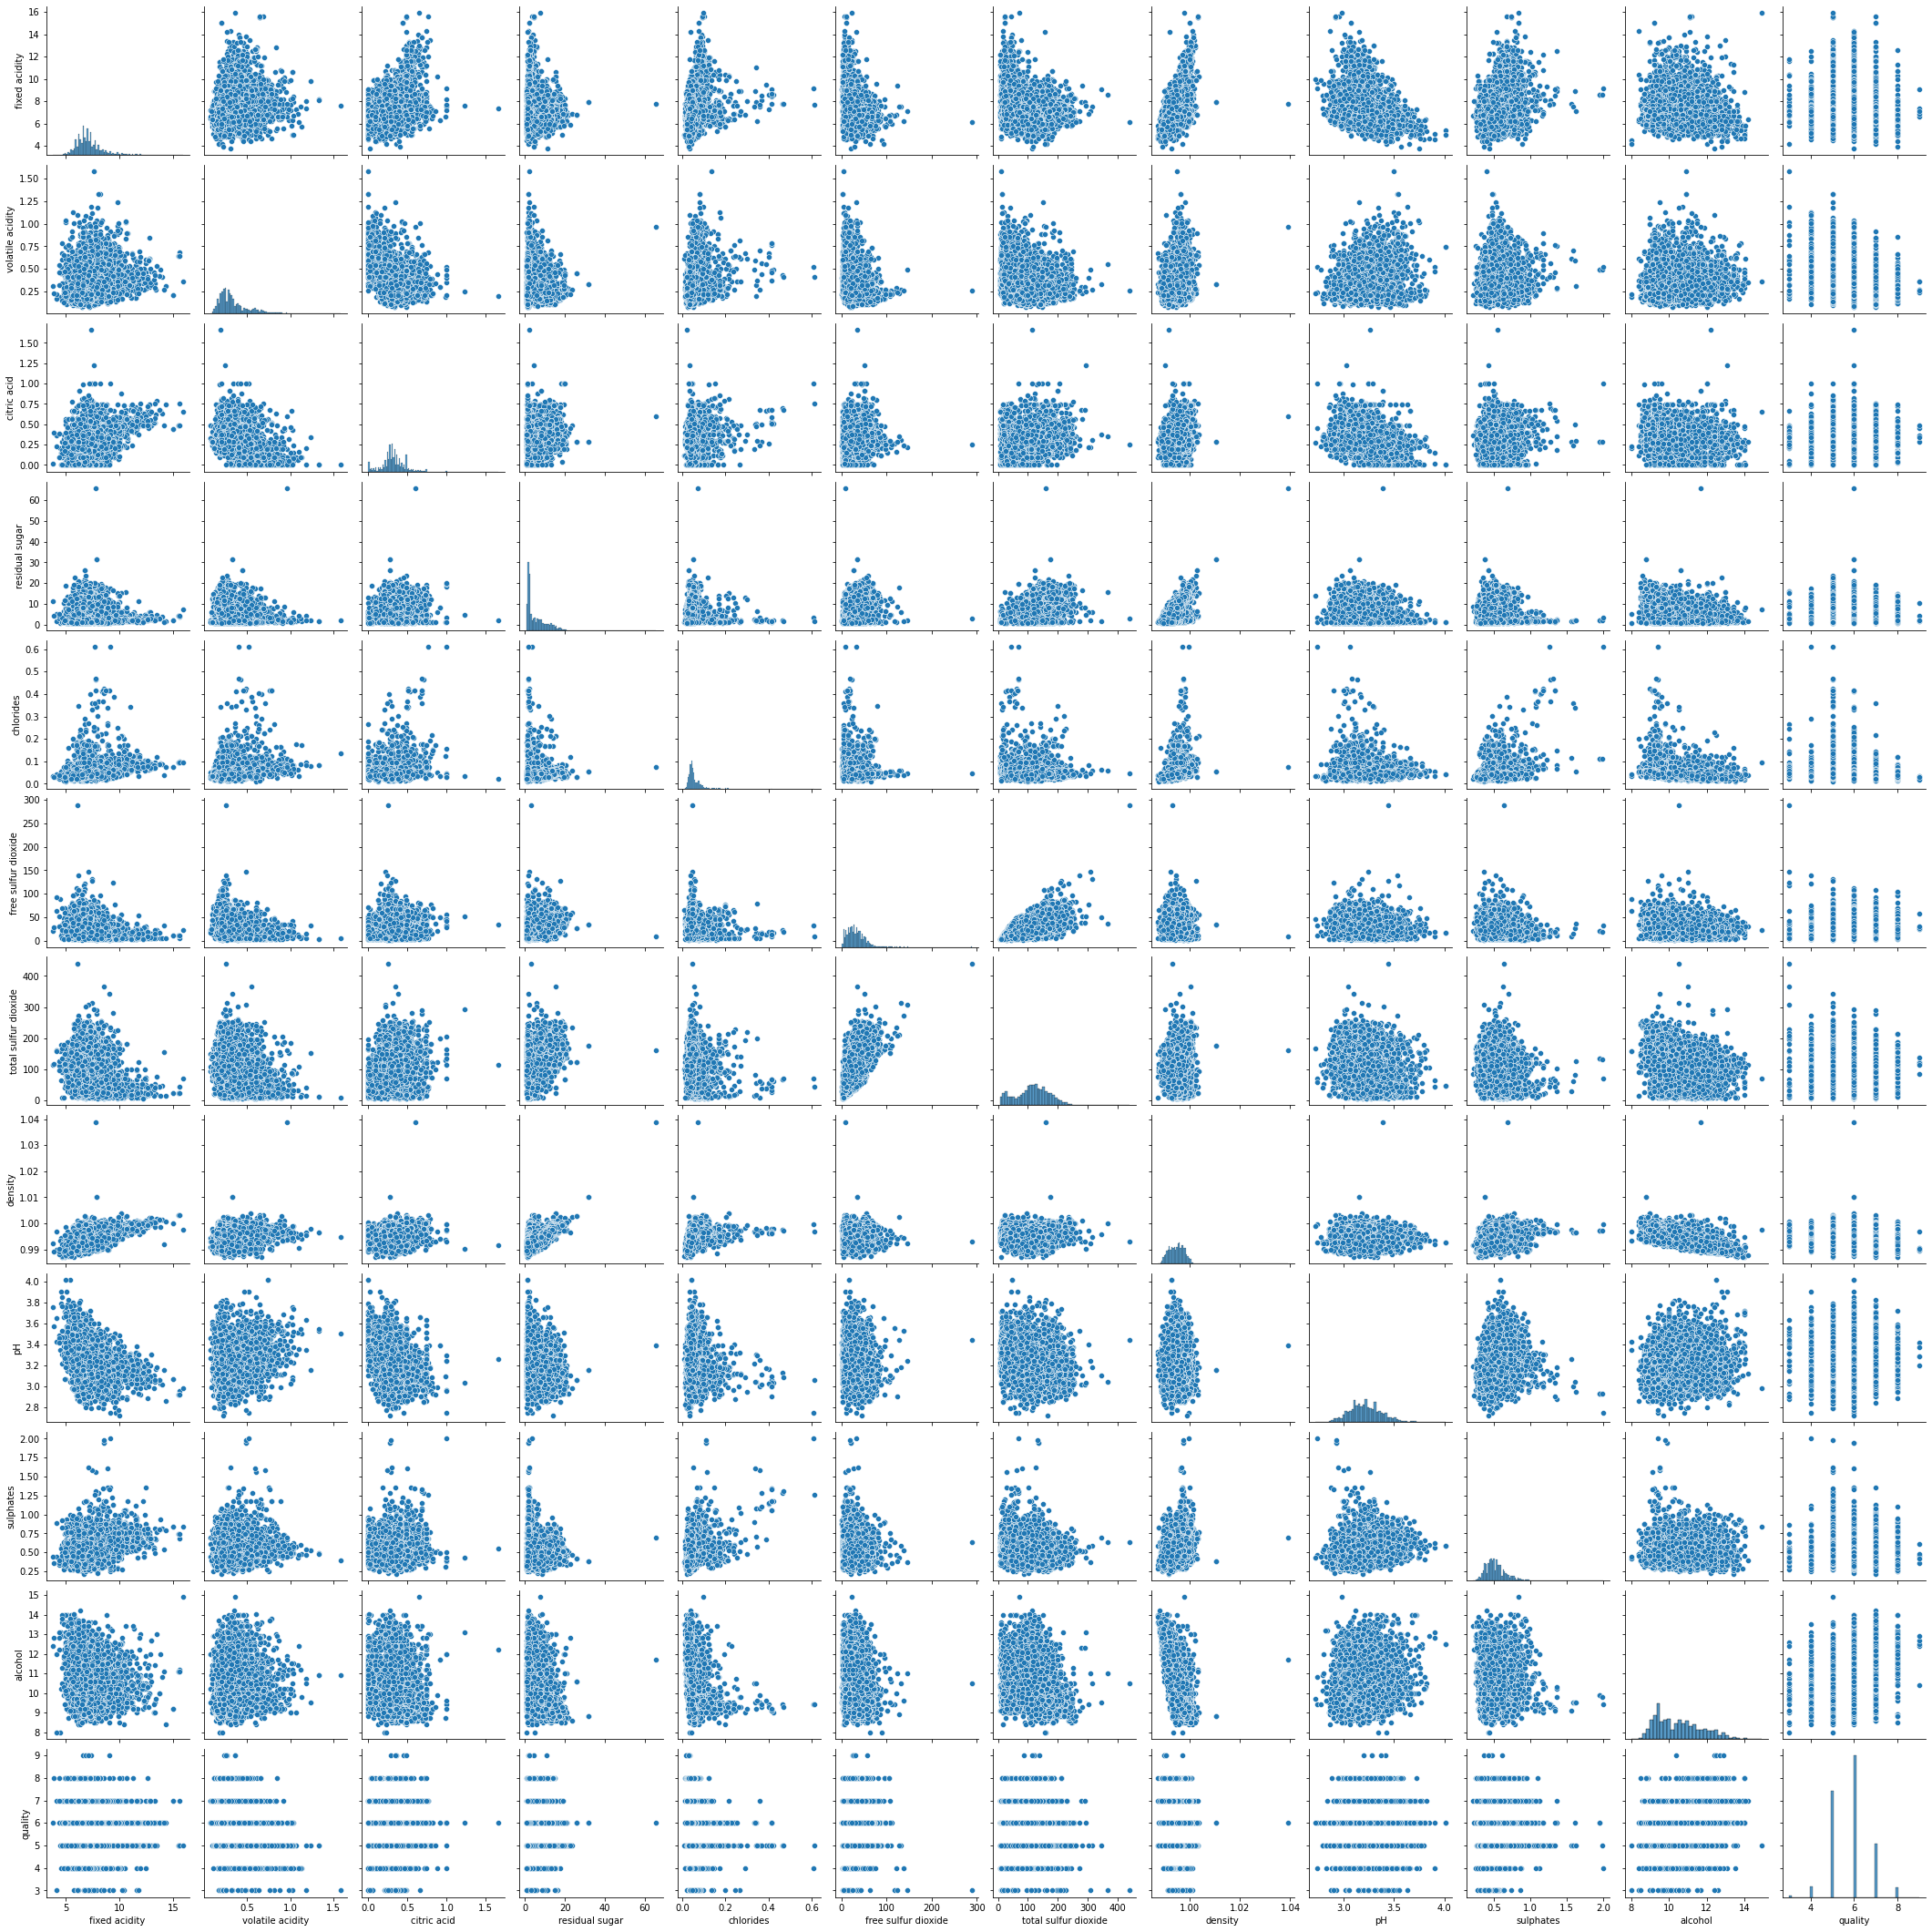

In [96]:
sns.pairplot(wineQuality)


## 1.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый в соотношении 80%/20% при помощи функции train_test_split библиотеки sklearn.model_selection. При необходимости категориальные признаки в числовые (например, при помощи функции get_dummies библиотеки pandas).

In [201]:
train, test = train_test_split(pd.get_dummies(wineQuality), train_size=0.8, random_state=80)
droppedTrain = train.drop(columns='quality')
trainQuality = train.quality
droppedTest = test.drop(columns='quality')
testQuality = test.quality

## 1.4 OLS regression

Обучить модель линейной регрессии методом наименьших квадратов (ordinary least squares linear regression), импортировав класс `LinearRegression` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE. Посмотрите, как влияет исключение из набора данных выбросов (экстремальных значений, например, больше 95 квантиля) на оценку ошибки.



In [202]:
linear = LinearRegression().fit(droppedTrain, trainQuality)
metricRate = RMSE(testQuality, linear.predict(droppedTest), squared=False)

print(errorLine(metricRate))

Baseline: 0.8 RMSE: 0.7413384355865587


In [203]:
# Getting quantile
quantile = np.quantile(wineQuality.quality, 0.95)
# Filtering by quantile
ftrain = train[train.quality <= quantile]
ftest = test[test.quality <= quantile]

droppedFilteredTrain = ftrain.drop(columns='quality')
filteredTrainQuality = ftrain.quality
droppedFilteredTest = ftest.drop(columns='quality')
filteredTestQuality = ftest.quality

linear = LinearRegression().fit(droppedFilteredTrain, filteredTrainQuality)
metricRate = RMSE(filteredTestQuality, linear.predict(droppedFilteredTest), squared=False)

print(errorLine(metricRate))


Baseline: 0.8 RMSE: 0.6760667716751937


## 1.5 Ridge regression

Обучить модель линейной регрессии с $L_2$-регуляризацией (Гребневая регрессия, Ridge regression), импортировав класс `Ridge` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE


In [204]:
ridge = Ridge().fit(droppedFilteredTrain, filteredTrainQuality)
metricRate = RMSE(filteredTestQuality, ridge.predict(droppedFilteredTest), squared=False)

print(errorLine(metricRate))

Baseline: 0.8 RMSE: 0.6747239926848458


## 1.6 Lasso regression

Обучить модель линейной регрессии с $L_1$-регуляризацией (Lasso regression), импортировав класс `Lasso` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE

In [205]:
lasso = Lasso().fit(droppedFilteredTrain, filteredTrainQuality)
metricRate = RMSE(filteredTestQuality, lasso.predict(droppedFilteredTest), squared=False)

print(errorLine(metricRate))

Baseline: 0.8 RMSE: 0.7972673047539913


## 1.7 Оптимизация Ridge regression

Сделайте перебор в цикле гиперпараметра `alpha` для модели `Ridge` от 0 до 1 с шагом 0.05. Постройте график ошибки RMSE на тестовых данных в зависимости от гиперпараметра `alpha`

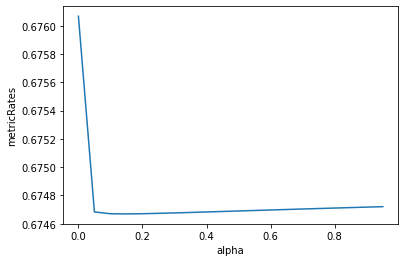

In [206]:
metricRates = []
alphas = np.arange(0, 1, 0.05)
for a in alphas:
    ridge = Ridge(alpha=a).fit(droppedFilteredTrain, filteredTrainQuality)
    metricRates.append(
        RMSE(filteredTestQuality, ridge.predict(droppedFilteredTest), squared=False)
        )

plt.plot(alphas, metricRates)
plt.xlabel('alpha')
plt.ylabel('metricRates')
plt.show()

## 1.8 Вывод

Сравните качество (величину ошибки) для моделей из пп. 1.4-1.7. Какая модель показала наилучший результат?

Ваш ответ: исходя из полученных результатов модель линейной регрессии методом наименьших квадратов показала наилучший результат. Метрика RMSE = 0.6760667716751937.  

# 2. Задача классификации (9 баллов)

Постройте модель машинного обучения, решающую задачу классификации на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 2.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки `pandas`

In [220]:
classificationBaseline = 0.70
emoloyeeAttrition = pd.read_csv('./data/Employee-Attrition.csv')

def result(rate: float):
    return f'Baseline: {classificationBaseline} Score: {rate}'

## 2.2 Предобработка данных

Проведите необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведите данные к такому виду, чтобы их можно было использовать для обучения моделей.

In [213]:
# Categorical features into numerical
columnsToDummy = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
dummyEmployeeAttrition = pd.get_dummies(emoloyeeAttrition, columns=columnsToDummy)
# Encode string values
dummyEmployeeAttrition['Attrition'] = LabelEncoder().fit_transform(dummyEmployeeAttrition['Attrition'])
# Standardization
normalizedEmployeeAttrition = pd.DataFrame(
    StandardScaler().fit(dummyEmployeeAttrition).transform(dummyEmployeeAttrition),
     columns=dummyEmployeeAttrition.columns)


## 2.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки ???

In [225]:
train, test, trainAttrition, testAttrition = train_test_split(
    normalizedEmployeeAttrition,
    dummyEmployeeAttrition.Attrition,
    train_size=0.8,
    random_state=1
)

droppedTrain = train.drop(columns='Attrition')
droppedTest = test.drop(columns='Attrition')


## 2.4 Логистическая регрессия
Обучите модель логистической регрессии, используя стандартную реализацию sklearn.linear_model.LogisticRegression. Оцените метрики качества полученной модели при помощи sklearn.metrics.classification_report и sklearn.metrics.f1_score.

In [226]:
# Train
linear = LogisticRegression().fit(droppedTrain, trainAttrition)
# Predict
prediction = linear.predict(droppedTest)
# Rating
print(classification_report(testAttrition, prediction, target_names=['Attrition: No', 'Attrition: Yes']))
print(result(f1_score(testAttrition, prediction, average='macro')))


                precision    recall  f1-score   support

 Attrition: No       0.86      0.97      0.91       236
Attrition: Yes       0.75      0.36      0.49        58

      accuracy                           0.85       294
     macro avg       0.81      0.67      0.70       294
  weighted avg       0.84      0.85      0.83       294

Baseline: 0.7 Score: 0.7003613453164088


## 2.5 Подбор гиперпараметра регуляризации

При помощи sklearn.model_selection.GridSearchCV переберите оптимальные параметры C в диапазоне 0.01 до 1 с шагом 0.1.

In [222]:
grid = {"C": np.arange(0.01,1,0.1)}
gridSearch = GridSearchCV(LogisticRegression(), grid).fit(droppedTrain, trainAttrition)

print(result(gridSearch.best_score_))

Baseline: 0.7 Score: 0.8877641543454742


## 2.6 Выводы

Сравните качество (величину ошибки) для моделей из пп. 2.4-2.5. Какая модель показала наилучший результат?

Ваш ответ: Исходя из полученных результатов подбор гиперпараметра регуляции показал наилучшие результаты.

# 3. Самописная линейная регрессиия (3 балла)

Релизовать алгоритм построения модели линейной регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [277]:
class SGDLinearRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon
        pass

    def fit(self, X, y, iterations=500):
        # Ваш код здесь
        pass
    
    def predict(self, X):
        # Ваш код здесь
        pass


3.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

3.3 Обучите модель на основе класса sklearn.linear_model.SGDRegressor с параметрами `alpha=0`. Сравните качество с вашими моделями из пункта 3.2.

Ваш вывод (2-3 предложения):

# 4. Самописная логистическая регрессиия (4 балла)

Релизовать алгоритм построения модели логистической регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [278]:
class SGDLogisticRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon
        pass

    def sigmoid(self, a):
        return  1. / (1. + np.exp(-1. * a))

    def fit(self, X, y, iterations=500):
        # Ваш код здесь
        pass


    def predict(self, X):
        # Ваш код здесь
        pass


4.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

 4.3 Обучите модель на основе класса sklearn.linear_model.SGDClassifier с параметрами `loss='log'`. Сравните качество с вашими моделями из пункта 4.2.

Ваш вывод (2-3 предложения):